https://colab.research.google.com/drive/184rNZcLkj1B6ClipbLoJKIDr8QNCq3Cr#scrollTo=4dot0LbMKJrp

In [1]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
file_id = "1CwsYiq3UNMAs7iMhHeRjcs6L1eD1EIqU"
url = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(url)

# A

In [3]:
df.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df = df.drop(columns=['Id'])

In [7]:
df.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


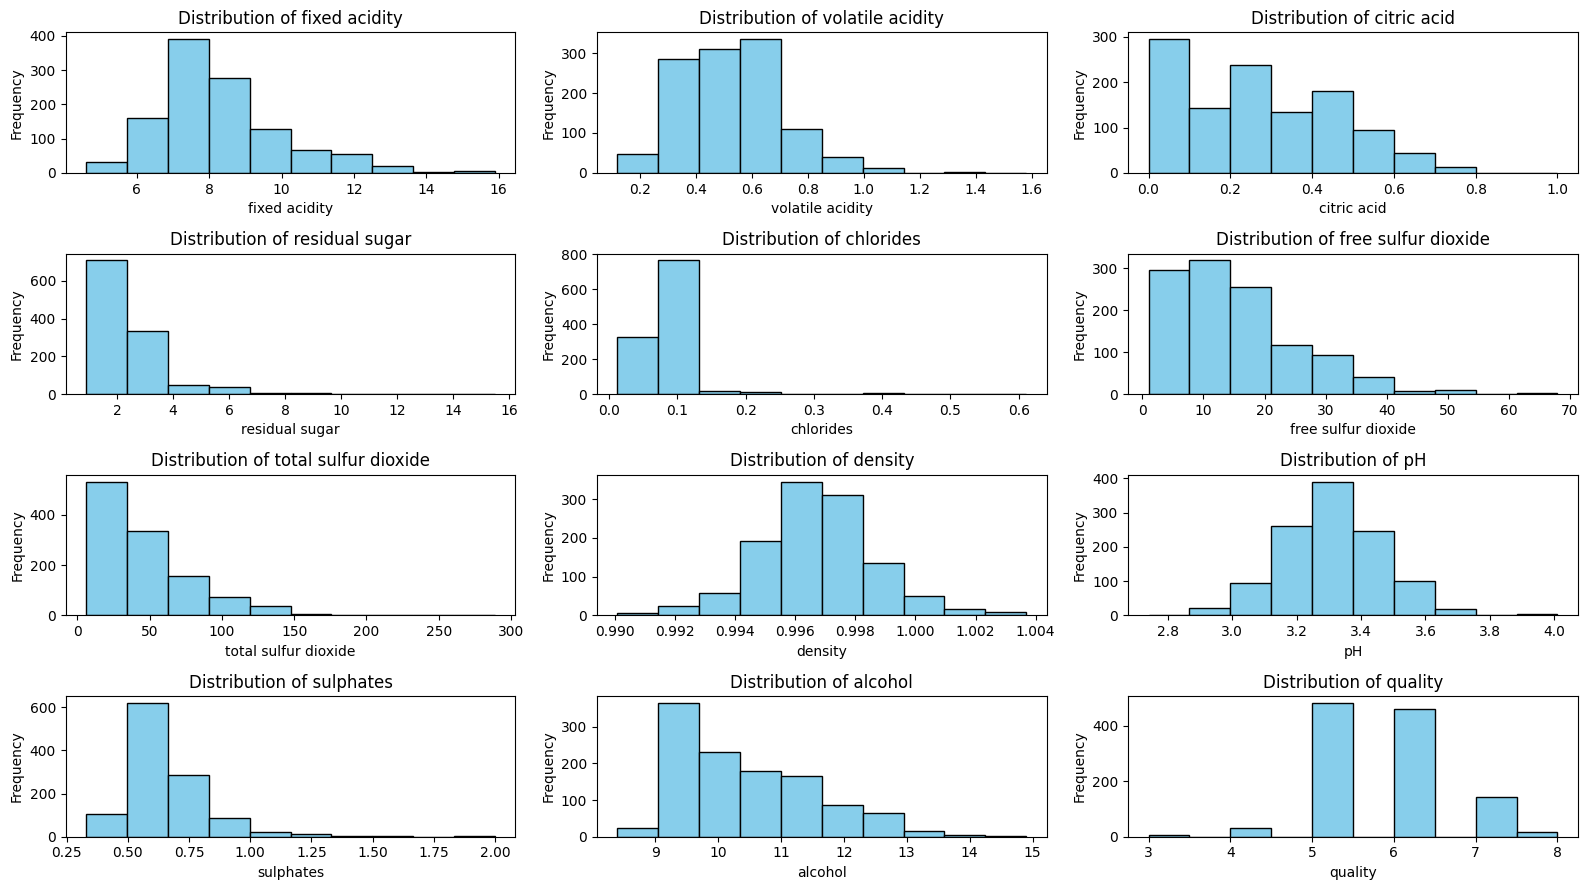

In [11]:
fig, axes = plt.subplots(4, 3,figsize = (16,9))

axes = axes.flatten()

for i, column in enumerate(df.columns):
    plt.subplot(4, 3, i + 1)
    plt.hist(df[column], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

only citric acid contains zero values which seems reasonble based on its distribution.

In [12]:
# Check for zero values in each column
zero_values = (df == 0).sum()

# Display columns with zero values and their counts
print("Columns with zero values and their counts:")
print(zero_values[zero_values > 0])


Columns with zero values and their counts:
citric acid    99
dtype: int64


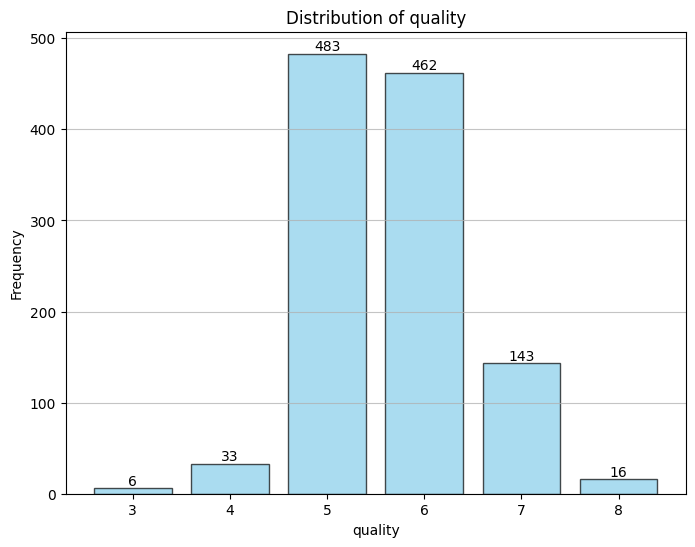

In [15]:
last_column_name = 'quality'
value_counts = df[last_column_name].value_counts().sort_index()
plt.figure(figsize=(8, 6))
bars = plt.bar(value_counts.index, value_counts.values, color='skyblue', edgecolor='black', alpha=0.7)

# Add counts on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

# Customize the plot
plt.title(f"Distribution of {last_column_name}")
plt.xlabel(last_column_name)
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()


Z-score  normalization

In [16]:
X = df.drop(columns=['quality'])
y = df['quality']

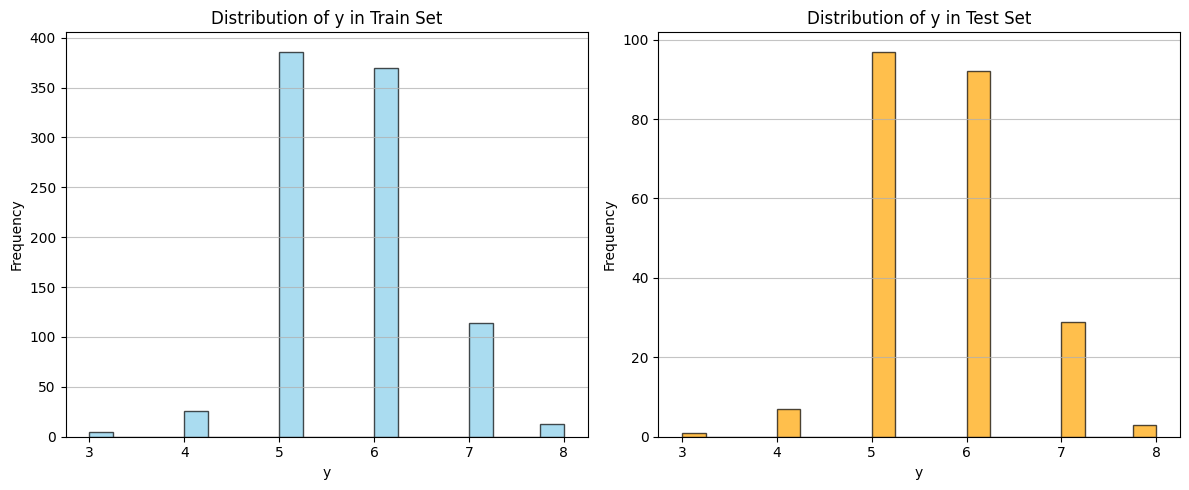

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)
plt.figure(figsize=(12, 5))

# Train set distribution
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Distribution of y in Train Set")
plt.xlabel("y")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)

# Test set distribution
plt.subplot(1, 2, 2)
plt.hist(y_test, bins=20, color='orange', edgecolor='black', alpha=0.7)
plt.title("Distribution of y in Test Set")
plt.xlabel("y")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Scaled X_train shape:", X_train_scaled.shape)
print("Scaled X_test shape:", X_test_scaled.shape)


Scaled X_train shape: (914, 11)
Scaled X_test shape: (229, 11)


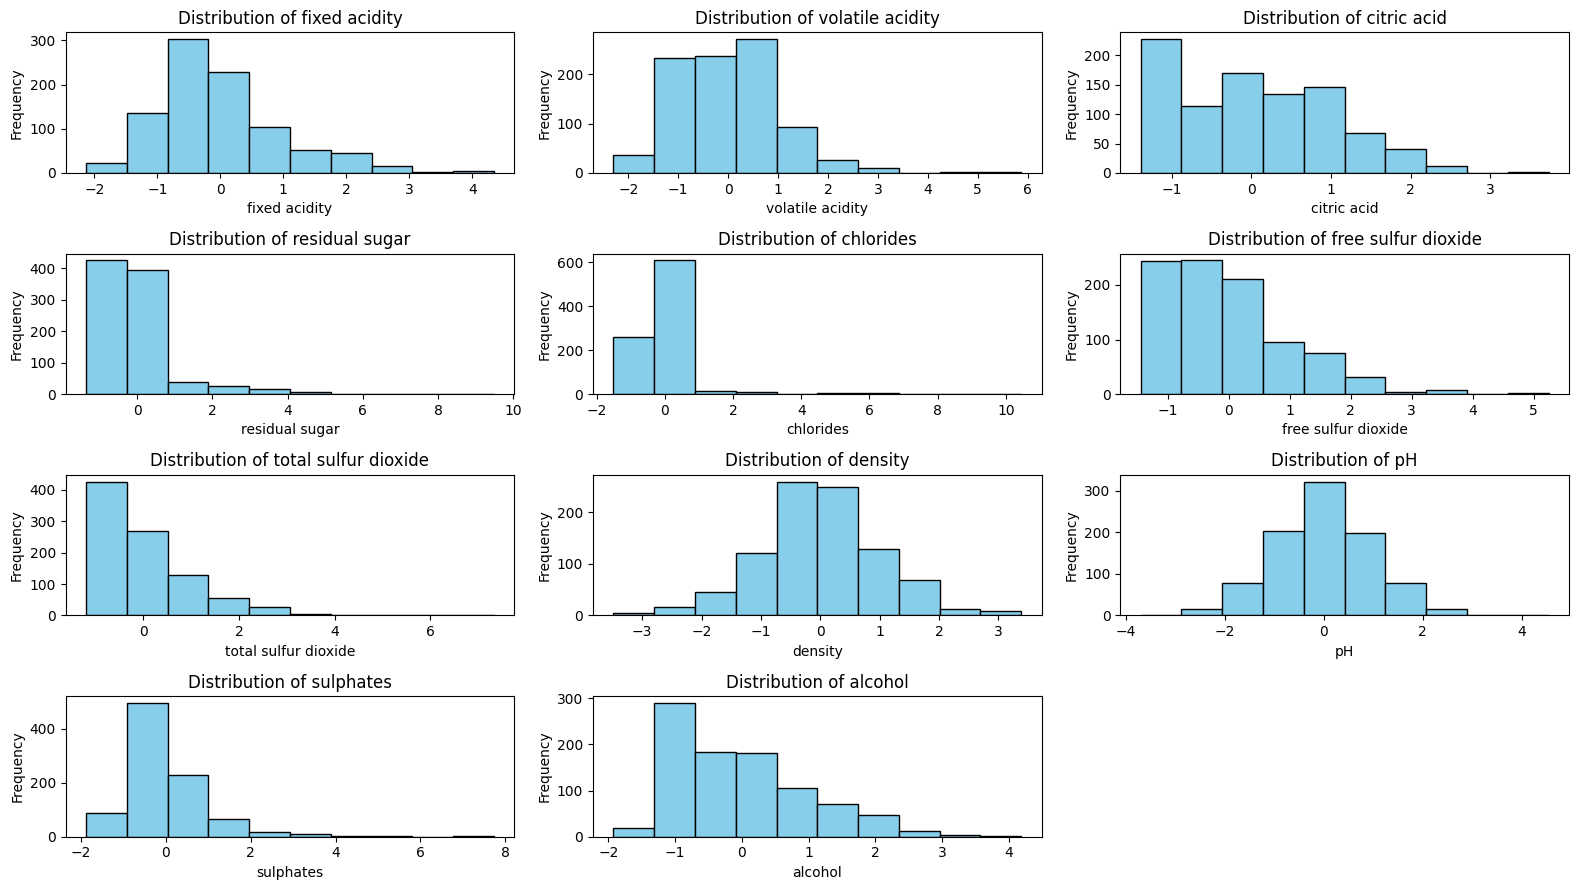

In [23]:
fig, axes = plt.subplots(4, 3,figsize = (16,9))

axes = axes.flatten()
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

for i, column in enumerate(X_train_scaled_df.columns):
    plt.subplot(4, 3, i + 1)
    plt.hist(X_train_scaled_df[column], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
axes[-1].axis('off')
plt.show()

counting the outliers in each feature (|z-score| > 3)

In [25]:
z_scores = np.abs(X_train_scaled)

# Find the number of observations where Z-score > 3 for each feature
outlier_counts = (z_scores > 3).sum(axis=0)

outlier_counts_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Outliers (>3 SD)': outlier_counts
})
print(outlier_counts_df)


                 Feature  Outliers (>3 SD)
0          fixed acidity                 7
1       volatile acidity                 4
2            citric acid                 1
3         residual sugar                27
4              chlorides                18
5    free sulfur dioxide                 9
6   total sulfur dioxide                 8
7                density                 9
8                     pH                 4
9              sulphates                15
10               alcohol                 5


normal features outlier capping (using 3sd)

In [27]:
normal_features = ['density', 'pH']

# Outlier detection for normal features using 3 SD
outliers_normal = (np.abs(X_train_scaled_df[normal_features]) > 3).sum()
print("Outliers in normal features (using 3 SD):")
print(outliers_normal)

# Capping for normal features using 3 SD
for feature in normal_features:
    X_train_scaled_df[feature] = X_train_scaled_df[feature].clip(lower=-3, upper=3)

print("\nCapping applied to normal features using 3 SD.")


Outliers in normal features (using 3 SD):
density    9
pH         4
dtype: int64

Capping applied to normal features using 3 SD.


Non-normal features outlier capping (detection using IQR method)

In [28]:
non_normal_features = [col for col in X_train_scaled_df.columns if col not in normal_features]

# Outlier detection for non-normal features using IQR
Q1 = X_train_scaled_df[non_normal_features].quantile(0.25)
Q3 = X_train_scaled_df[non_normal_features].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers
outliers_non_normal = ((X_train_scaled_df[non_normal_features] < lower_bound) | (X_train_scaled_df[non_normal_features] > upper_bound)).sum()
print("Outliers in non-normal features (using IQR):")
print(outliers_non_normal)

# Capping for non-normal features using boxplot bounds
for feature in non_normal_features:
    X_train_scaled_df[feature] = X_train_scaled_df[feature].clip(lower=lower_bound[feature], upper=upper_bound[feature])

print("\nCapping applied to non-normal features using IQR bounds.")


Outliers in non-normal features (using IQR):
fixed acidity           37
volatile acidity        11
citric acid              1
residual sugar          89
chlorides               60
free sulfur dioxide     13
total sulfur dioxide    32
sulphates               37
alcohol                  9
dtype: int64

Capping applied to non-normal features using IQR bounds.


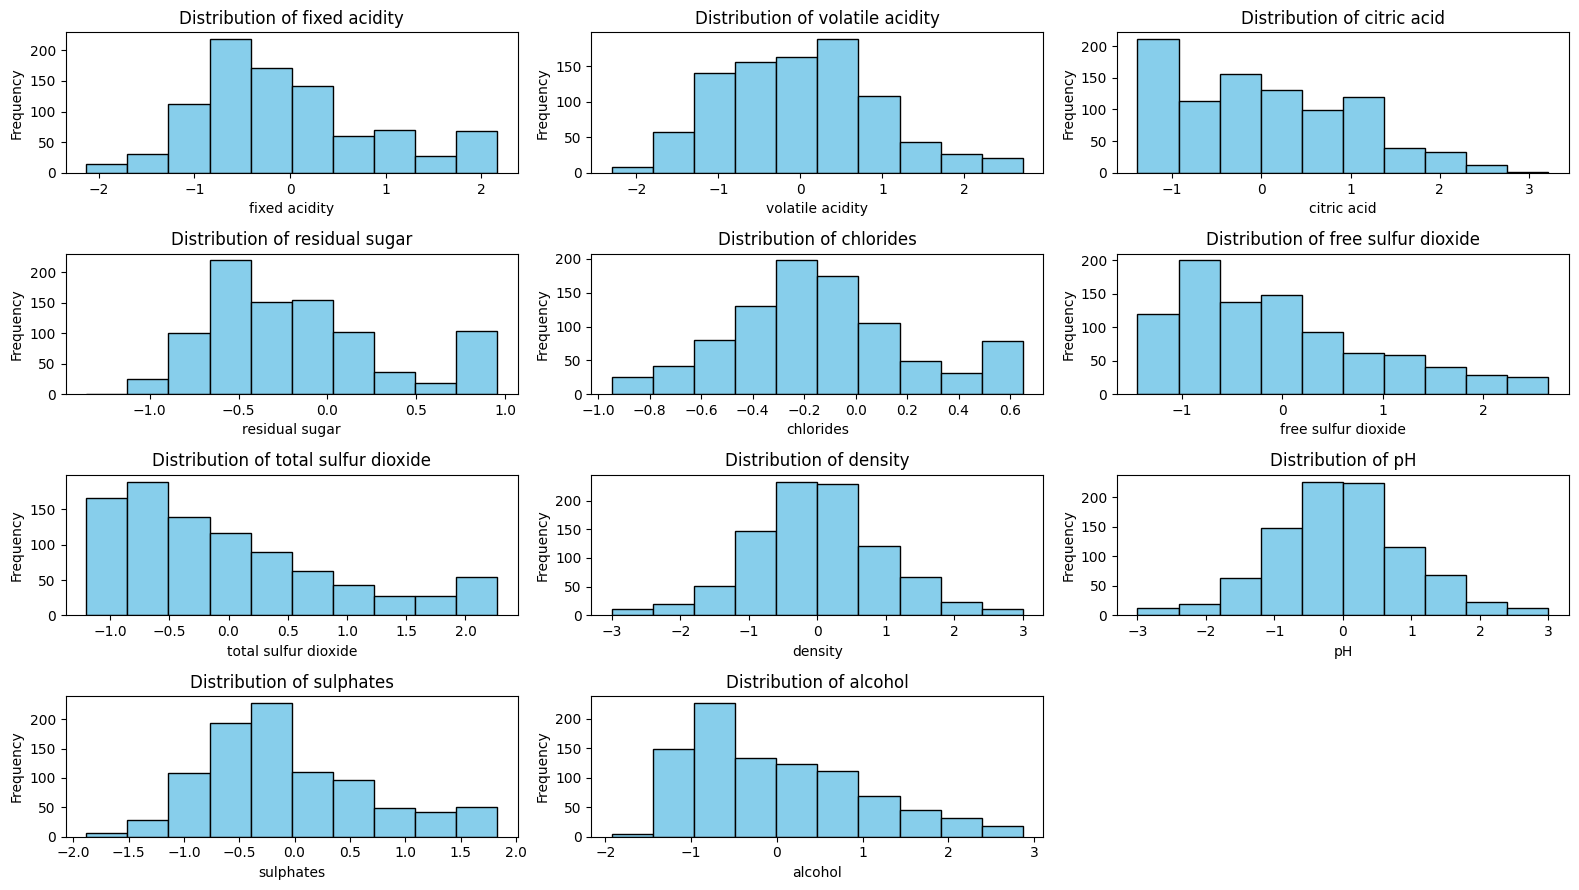

In [29]:
fig, axes = plt.subplots(4, 3,figsize = (16,9))
axes = axes.flatten()
for i, column in enumerate(X_train_scaled_df.columns):
    plt.subplot(4, 3, i + 1)
    plt.hist(X_train_scaled_df[column], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
axes[-1].axis('off')
plt.show()

# Outlier Detection and Management in the Drink Dataset

## Step 1: Z-Score Normalization

Before detecting outliers, we normalized all features using **Z-score normalization**. This technique standardizes each feature to have a mean of 0 and a standard deviation of 1:

\[
Z = \frac{X - \mu}{\sigma}
\]

Where:
- \( Z \): The standardized value.
- \( X \): The original value.
- \( \mu \): The mean of the feature.
- \( \sigma \): The standard deviation of the feature.

### Why Normalize?
- Ensures all features are on the same scale, making it easier to detect extreme deviations.
- For normal distributions, Z-scores represent the number of standard deviations a value is away from the mean, which is crucial for outlier detection.

---

## Step 2: Analyzing Feature Distributions

After normalization, we visualized the distributions of all features to determine whether they followed a **normal distribution**. Based on the inspection:
- **Normal Features:** `density`, `pH`.
- **Non-Normal Features:** All other features (e.g., `residual sugar`, `chlorides`, etc.).

This distinction was critical, as different methods are suitable for normal and non-normal distributions.

---

## Step 3: Outlier Detection

### **For Normal Features (Z-Score Method)**
For features with normal distributions, we used the **Z-score method**:
- Any observation with a Z-score outside the range \(-3\) to \(+3\) was flagged as an outlier.
- This threshold corresponds to approximately 99.7% of the data in a normal distribution, meaning outliers are rare deviations from the mean.

#### Example:
If a value in `pH` has a Z-score of \(+3.5\), it indicates it is 3.5 standard deviations away from the mean, and it is flagged as an outlier.

---

### **For Non-Normal Features (IQR Method)**

For features with non-normal distributions, we used the **Interquartile Range (IQR) method**:
1. Calculate the **1st Quartile (\(Q1\))** and **3rd Quartile (\(Q3\))** of the feature.
2. Compute the **IQR**:
   \[
   IQR = Q3 - Q1
   \]
3. Define the **lower and upper bounds**:
   \[
   \text{Lower Bound} = Q1 - 1.5 \cdot IQR
   \]
   \[
   \text{Upper Bound} = Q3 + 1.5 \cdot IQR
   \]
4. Any value below the lower bound or above the upper bound was flagged as an outlier.

#### Why IQR for Non-Normal Features?
- Non-normal distributions often have long tails or skewness, making Z-score thresholds unsuitable.
- The IQR method is robust to such properties since it focuses on the central 50% of the data and ignores extreme values.

---

## Step 4: Outlier Management (Capping)

Once outliers were detected, we applied **capping** to reduce their impact without discarding valuable data. Capping replaces outliers with the nearest non-outlier boundary.

### **Capping for Normal Features (Z-Score Method):**
- Outliers with \( Z < -3 \) were capped at \( Z = -3 \).
- Outliers with \( Z > +3 \) were capped at \( Z = +3 \).

### **Capping for Non-Normal Features (IQR Method):**
- Values below the lower bound (\(Q1 - 1.5 \cdot IQR\)) were capped at the lower bound.
- Values above the upper bound (\(Q3 + 1.5 \cdot IQR\)) were capped at the upper bound.

#### Why Capping?
- Reduces the influence of extreme values while retaining the observation in the dataset.
- Ensures features remain within a reasonable range for modeling.

---

## Step 5: Post-Processing Visualization

After capping, we re-visualized the distributions of all features. The updated plots showed:
- No extreme outliers remained in the data.
- Features retained their original shapes, but extreme values were adjusted to lie within acceptable bounds.

---

## Summary

### **Outlier Detection Methods**
1. **Z-Score Method (For Normal Features):**
   - Outliers: \( Z < -3 \) or \( Z > +3 \).

2. **IQR Method (For Non-Normal Features):**
   - Outliers: Values below \( Q1 - 1.5 \cdot IQR \) or above \( Q3 + 1.5 \cdot IQR \).

---

### **Outlier Management**
- **Capping:**
  - **Normal Features:** Adjusted to \(-3 \leq Z \leq +3\).
  - **Non-Normal Features:** Adjusted to \([Q1 - 1.5 \cdot IQR, Q3 + 1.5 \cdot IQR]\).

---

### **Results**
- The distributions of features after preprocessing showed no visible outliers.
- Features retained their shape, ensuring data integrity for modeling.
- The combination of Z-score and IQR methods, followed by capping, effectively handled outliers across normal and non-normal features.


In [32]:
X_train = X_train_scaled_df.to_numpy()
X_test = X_test_scaled
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# B

## Implementing logistic regression from scratch using softmax-cross-entropy loss function for numerical stability

In [91]:
import numpy as np

class LogisticRegression:
    def __init__(self, num_features, num_classes, softmax_variant="standard", class_weights=None, temperature=1.0, l2_reg=0.0):
        """
        Initialize weights, biases, and regularization.
        :param l2_reg: L2 regularization strength (lambda)
        """
        self.num_features = num_features
        self.num_classes = num_classes
        self.softmax_variant = softmax_variant
        self.class_weights = class_weights
        self.temperature = temperature
        self.l2_reg = l2_reg  # L2 regularization strength

        # Initialize weights and biases
        self.weights = np.random.randn(num_features, num_classes) * 0.01
        self.biases = np.zeros((1, num_classes))

    def softmax(self, logits):
        """
        Compute the softmax activation with variations.
        """
        logits = logits / self.temperature
        if self.softmax_variant == "weighted" and self.class_weights is not None:
            exp_logits = np.exp(logits - np.max(logits, axis=1, keepdims=True))
            weighted_logits = exp_logits * self.class_weights
            probabilities = weighted_logits / np.sum(weighted_logits, axis=1, keepdims=True)
        else:
            exp_logits = np.exp(logits - np.max(logits, axis=1, keepdims=True))
            probabilities = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)
        return probabilities

    def softmax_cross_entropy_loss(self, logits, y_true):
        """
        Combined softmax and cross-entropy loss with L2 regularization.
        """
        probabilities = self.softmax(logits)
        num_samples = y_true.shape[0]
        correct_log_probs = -np.log(probabilities[range(num_samples), y_true])
        cross_entropy_loss = np.sum(correct_log_probs) / num_samples

        # L2 Regularization term
        l2_loss = (self.l2_reg / 2) * np.sum(self.weights ** 2)
        total_loss = cross_entropy_loss + l2_loss

        return total_loss, probabilities

    def compute_gradients(self, X, probabilities, y_true):
        """
        Compute gradients of weights and biases.
        """
        num_samples = X.shape[0]
        y_one_hot = np.zeros((num_samples, self.num_classes))
        y_one_hot[np.arange(num_samples), y_true] = 1

        dw = np.dot(X.T, (probabilities - y_one_hot)) / num_samples
        db = np.sum(probabilities - y_one_hot, axis=0, keepdims=True) / num_samples

        # Add gradient of L2 regularization
        dw += self.l2_reg * self.weights

        return dw, db

    def update_parameters(self, dw, db, lr):
        """
        Update weights and biases using gradients and learning rate.
        """
        self.weights -= lr * dw
        self.biases -= lr * db

    def predict(self, X):
        """
        Predict class labels for the given input.
        """
        logits = np.dot(X, self.weights) + self.biases
        probabilities = self.softmax(logits)
        predictions = np.argmax(probabilities, axis=1)
        return predictions


In [96]:
from sklearn.metrics import f1_score

def train(model, X_train, y_train, X_val=None, y_val=None, num_epochs=100, lr=0.01, verbose=True):
    """
    Train the logistic regression model and save the best model based on validation accuracy.
    Also reports the F1-score of the best model.
    """
    best_model = {
        "weights": None,
        "biases": None,
        "accuracy": 0,  # Best validation or training accuracy
        "f1_score": 0   # F1-score of the best model
    }

    for epoch in range(num_epochs):
        # Forward pass
        logits = np.dot(X_train, model.weights) + model.biases
        loss, probabilities = model.softmax_cross_entropy_loss(logits, y_train)

        # Backward pass
        dw, db = model.compute_gradients(X_train, probabilities, y_train)

        # Update parameters
        model.update_parameters(dw, db, lr)

        # Evaluate on training and validation data
        train_predictions = model.predict(X_train)
        train_accuracy = np.mean(train_predictions == y_train)

        if X_val is not None and y_val is not None:
            val_predictions = model.predict(X_val)
            val_accuracy = np.mean(val_predictions == y_val)

            # Calculate F1-score for the validation set
            val_f1_score = f1_score(y_val, val_predictions, average='weighted')

            # Save the best model based on validation accuracy
            if val_accuracy > best_model["accuracy"]:
                best_model["weights"] = model.weights.copy()
                best_model["biases"] = model.biases.copy()
                best_model["accuracy"] = val_accuracy
                best_model["f1_score"] = val_f1_score

            if verbose and (epoch % 1000 == 0 or epoch == num_epochs - 1):
                print(f"Epoch {epoch+1}/{num_epochs}: Loss={loss:.4f}, Train Accuracy={train_accuracy:.4f}, "
                      f"Test Accuracy={val_accuracy:.4f}, F1-Score={val_f1_score:.4f}")
        else:
            # Save the best model based on training accuracy if no validation set
            train_f1_score = f1_score(y_train, train_predictions, average='weighted')
            if train_accuracy > best_model["accuracy"]:
                best_model["weights"] = model.weights.copy()
                best_model["biases"] = model.biases.copy()
                best_model["accuracy"] = train_accuracy
                best_model["f1_score"] = train_f1_score

            if verbose and (epoch % 1000 == 0 or epoch == num_epochs - 1):
                print(f"Epoch {epoch+1}/{num_epochs}: Loss={loss:.4f}, Train Accuracy={train_accuracy:.4f}, "
                      f"Train F1-Score={train_f1_score:.4f}")

    # Restore the best weights and biases
    model.weights = best_model["weights"]
    model.biases = best_model["biases"]

    print("\nTraining complete. Best model saved with accuracy:", best_model["accuracy"])
    print("Best model F1-Score:", best_model["f1_score"])


In [83]:
# Re-map class labels to range 0 to num_classes - 1
unique_classes = np.unique(np.concatenate([y_train, y_test]))
class_mapping = {original: new for new, original in enumerate(unique_classes)}

# Apply the mapping
y_train = np.array([class_mapping[label] for label in y_train])
y_test = np.array([class_mapping[label] for label in y_test])

# Check the updated classes
print("Re-labeled y_train:", np.unique(y_train))
print("Re-labeled y_test:", np.unique(y_test))


Re-labeled y_train: [0 1 2 3 4 5]
Re-labeled y_test: [0 1 2 3 4 5]


In [84]:
np.random.seed(42)

# Initialize the model
num_features = X_train.shape[1]
num_classes = len(np.unique(y_train))
model = LogisticRegression(num_features, num_classes)

# Train the model
train(model, X_train, y_train, X_test, y_test, num_epochs=10000, lr=0.002)


Epoch 1/10000: Loss=1.7920, Train Accuracy=0.1882, Test Accuracy=0.2140
Epoch 1001/10000: Loss=1.3405, Train Accuracy=0.5744, Test Accuracy=0.6157
Epoch 2001/10000: Loss=1.1659, Train Accuracy=0.5908, Test Accuracy=0.6376
Epoch 3001/10000: Loss=1.0842, Train Accuracy=0.6018, Test Accuracy=0.6332
Epoch 4001/10000: Loss=1.0386, Train Accuracy=0.6028, Test Accuracy=0.6376
Epoch 5001/10000: Loss=1.0101, Train Accuracy=0.6083, Test Accuracy=0.6419
Epoch 6001/10000: Loss=0.9910, Train Accuracy=0.6007, Test Accuracy=0.6419
Epoch 7001/10000: Loss=0.9774, Train Accuracy=0.6072, Test Accuracy=0.6245
Epoch 8001/10000: Loss=0.9673, Train Accuracy=0.6050, Test Accuracy=0.6288
Epoch 9001/10000: Loss=0.9595, Train Accuracy=0.6039, Test Accuracy=0.6332
Epoch 10000/10000: Loss=0.9533, Train Accuracy=0.6072, Test Accuracy=0.6288

Training complete. Best model saved with accuracy: 0.6462882096069869


In [39]:
print(num_classes)

6


In [54]:
y_true = y_test
y_pred = model.predict(X_test)


Confusion Matrix:


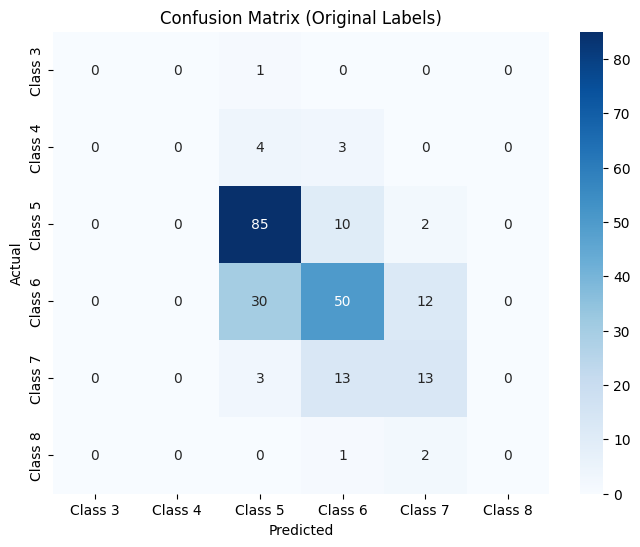

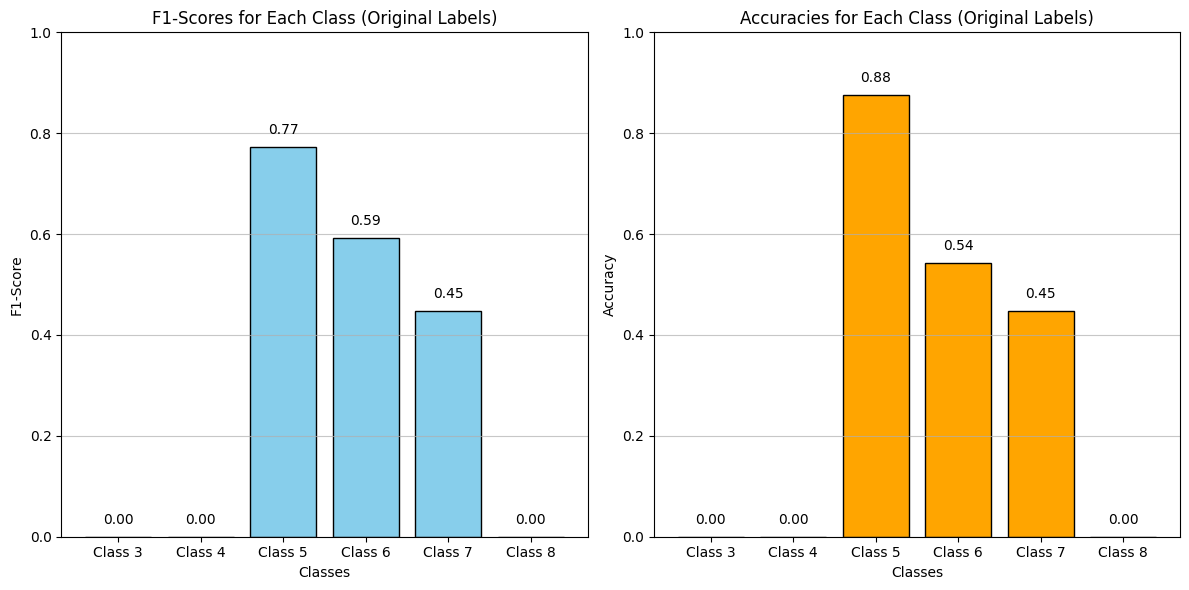

In [56]:
from sklearn.metrics import confusion_matrix, f1_score

# Reverse the class mapping dictionary
reverse_mapping = {v: k for k, v in class_mapping.items()}

# Convert predictions and true labels back to the original class labels
y_true_original = np.array([reverse_mapping[label] for label in y_true])
y_pred_original = np.array([reverse_mapping[label] for label in y_pred])

# Confusion Matrix with Original Class Labels
cm = confusion_matrix(y_true_original, y_pred_original)
print("\nConfusion Matrix:")

# Class-wise F1-Scores and Accuracies with Original Labels
class_f1_scores = f1_score(y_true_original, y_pred_original, average=None)
class_accuracies = [cm[i, i] / cm[i].sum() for i in range(len(cm))]

# Visualization: Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[f"Class {i}" for i in np.unique(y_true_original)],
            yticklabels=[f"Class {i}" for i in np.unique(y_true_original)])
plt.title("Confusion Matrix (Original Labels)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Visualization: F1-Scores and Accuracies
classes = [f"Class {i}" for i in np.unique(y_true_original)]

plt.figure(figsize=(12, 6))

# F1-Scores
plt.subplot(1, 2, 1)
bars_f1 = plt.bar(classes, class_f1_scores, color='skyblue', edgecolor='black')
plt.title("F1-Scores for Each Class (Original Labels)")
plt.xlabel("Classes")
plt.ylabel("F1-Score")
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.7)

# Add F1-Scores as Text
for bar in bars_f1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f'{height:.2f}', ha='center', va='bottom')

# Accuracies
plt.subplot(1, 2, 2)
bars_acc = plt.bar(classes, class_accuracies, color='orange', edgecolor='black')
plt.title("Accuracies for Each Class (Original Labels)")
plt.xlabel("Classes")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.7)

# Add Accuracies as Text
for bar in bars_acc:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


# Logistic Regression with Softmax Activation: Analysis and Evaluation

In this question, we implemented a logistic regression model using the **Softmax activation function** and evaluated it on a multi-class classification problem. Below is a detailed explanation and interpretation of the results.

---

## Implementation Details

### **Logistic Regression with Softmax**
The model used the softmax function to output probabilities for each class. The softmax function ensures that:
1. Outputs for all classes are non-negative.
2. The sum of probabilities across all classes is 1.


### **Evaluation Metrics**
The model was evaluated using:
1. **Accuracy:** Measures the overall performance of the model.
Accuracy = Correct Predictions / Total Predictions
2. **F1-Score:** Provides a balance between precision and recall for each class, particularly useful for imbalanced datasets.
F1-Score = 2 * (Precision * Recall) / (Precision + Recall)
3. **Confusion Matrix:** Provides a detailed breakdown of the model's predictions across all classes.

---

## Results and Interpretation

### **Confusion Matrix**
The confusion matrix (shown in the first plot) demonstrates the model's performance across different classes. Key observations include:
- **Class 5:** The majority of predictions are concentrated here, indicating the model performs well on this class.
- **Classes 3, 4, and 8:** No correct predictions are made for these classes. This could indicate a lack of sufficient training data or model bias.

### **F1-Scores for Each Class**
The F1-scores (second plot) highlight the following:
- **Class 5** has the highest F1-score (0.77), indicating strong performance.
- **Classes 3, 4, and 8** have an F1-score of 0, reflecting poor performance due to the absence of correct predictions.
- **Class 6** achieves a moderate F1-score (0.59), while **Class 7** lags behind (0.45).

### **Accuracy for Each Class**
The class-wise accuracies (third plot) align with the F1-scores:
- **Class 5** achieves the highest accuracy (88%), demonstrating that the model is well-calibrated for this class.
- **Classes 3, 4, and 8** again have 0% accuracy, reinforcing the observation of poor predictions for these classes.

---

## Why Does the Model Struggle with Some Classes?

1. **Data Imbalance:**
   - The dataset is heavily imbalanced, with certain classes (e.g., Class 5) having significantly more data than others (e.g., Classes 3, 4, and 8).
   - The model inherently biases its predictions towards the majority class (Class 5).

2. **Feature Discrimination:**
   - Some features may not provide sufficient discriminatory power for underrepresented classes, making it difficult for the model to differentiate them.

---

## TODO
4. **Regularization:**
   - Implement regularization (e.g., L2 penalty) to prevent overfitting on the majority class.

---

## Conclusion

The logistic regression model with softmax activation demonstrates strong performance on the majority class (Class 5) but struggles with minority classes due to data imbalance and lack of feature discrimination. Addressing these challenges with class weighting, data augmentation, and advanced architectures can significantly improve the model's overall performance.


# C

# weighted softmax

Epoch 1/10000: Loss=2.4254, Train Accuracy=0.0066, Test Accuracy=0.0000
Epoch 1001/10000: Loss=1.6309, Train Accuracy=0.4617, Test Accuracy=0.5066
Epoch 2001/10000: Loss=1.2999, Train Accuracy=0.5864, Test Accuracy=0.6288
Epoch 3001/10000: Loss=1.1568, Train Accuracy=0.6007, Test Accuracy=0.6201
Epoch 4001/10000: Loss=1.0829, Train Accuracy=0.5985, Test Accuracy=0.6332
Epoch 5001/10000: Loss=1.0396, Train Accuracy=0.6050, Test Accuracy=0.6419
Epoch 6001/10000: Loss=1.0119, Train Accuracy=0.6050, Test Accuracy=0.6332
Epoch 7001/10000: Loss=0.9931, Train Accuracy=0.6061, Test Accuracy=0.6245
Epoch 8001/10000: Loss=0.9795, Train Accuracy=0.6050, Test Accuracy=0.6245
Epoch 9001/10000: Loss=0.9694, Train Accuracy=0.6050, Test Accuracy=0.6288
Epoch 10000/10000: Loss=0.9615, Train Accuracy=0.6072, Test Accuracy=0.6288

Training complete. Best model saved with accuracy: 0.6419213973799127

Confusion Matrix:


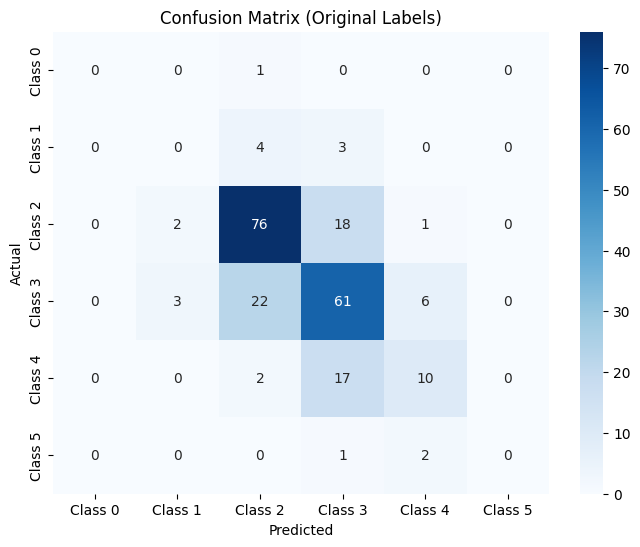

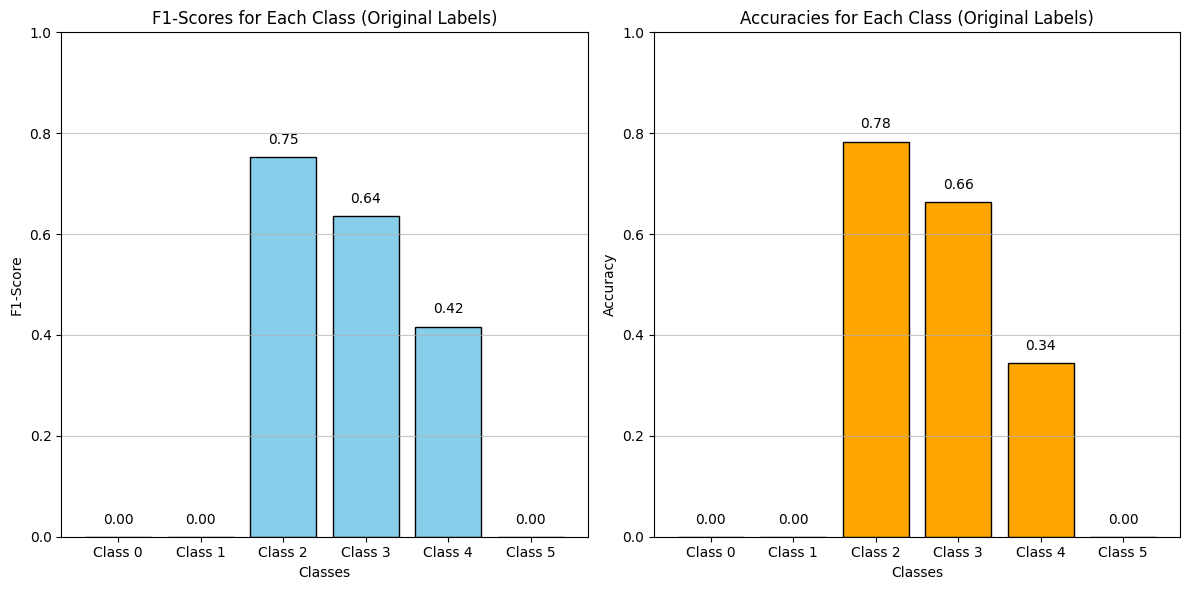

In [89]:
class_weights = np.array([3.0, 3.0, 1, 1, 1,3])
model = LogisticRegression(num_features=X_train.shape[1], num_classes=len(np.unique(y_train)),
                           softmax_variant="weighted", class_weights=class_weights)
train(model, X_train, y_train, X_test, y_test, num_epochs=10000, lr=0.002)

y_true = y_test
y_pred = model.predict(X_test)

# Reverse the class mapping dictionary
reverse_mapping = {v: k for k, v in class_mapping.items()}

# Convert predictions and true labels back to the original class labels
y_true_original = np.array([reverse_mapping[label] for label in y_true])
y_pred_original = np.array([reverse_mapping[label] for label in y_pred])

# Confusion Matrix with Original Class Labels
cm = confusion_matrix(y_true_original, y_pred_original)
print("\nConfusion Matrix:")

# Class-wise F1-Scores and Accuracies with Original Labels
class_f1_scores = f1_score(y_true_original, y_pred_original, average=None)
class_accuracies = [cm[i, i] / cm[i].sum() for i in range(len(cm))]

# Visualization: Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[f"Class {i}" for i in np.unique(y_true_original)],
            yticklabels=[f"Class {i}" for i in np.unique(y_true_original)])
plt.title("Confusion Matrix (Original Labels)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Visualization: F1-Scores and Accuracies
classes = [f"Class {i}" for i in np.unique(y_true_original)]

plt.figure(figsize=(12, 6))

# F1-Scores
plt.subplot(1, 2, 1)
bars_f1 = plt.bar(classes, class_f1_scores, color='skyblue', edgecolor='black')
plt.title("F1-Scores for Each Class (Original Labels)")
plt.xlabel("Classes")
plt.ylabel("F1-Score")
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.7)

# Add F1-Scores as Text
for bar in bars_f1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f'{height:.2f}', ha='center', va='bottom')

# Accuracies
plt.subplot(1, 2, 2)
bars_acc = plt.bar(classes, class_accuracies, color='orange', edgecolor='black')
plt.title("Accuracies for Each Class (Original Labels)")
plt.xlabel("Classes")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.7)

# Add Accuracies as Text
for bar in bars_acc:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


# temperature based softmax

Epoch 1/10000: Loss=1.7943, Train Accuracy=0.1499, Test Accuracy=0.1397
Epoch 1001/10000: Loss=1.3411, Train Accuracy=0.5832, Test Accuracy=0.6245
Epoch 2001/10000: Loss=1.1660, Train Accuracy=0.5941, Test Accuracy=0.6376
Epoch 3001/10000: Loss=1.0843, Train Accuracy=0.6018, Test Accuracy=0.6245
Epoch 4001/10000: Loss=1.0386, Train Accuracy=0.6007, Test Accuracy=0.6376
Epoch 5001/10000: Loss=1.0101, Train Accuracy=0.6061, Test Accuracy=0.6463
Epoch 6001/10000: Loss=0.9910, Train Accuracy=0.6018, Test Accuracy=0.6419
Epoch 7001/10000: Loss=0.9774, Train Accuracy=0.6072, Test Accuracy=0.6245
Epoch 8001/10000: Loss=0.9673, Train Accuracy=0.6050, Test Accuracy=0.6245
Epoch 9001/10000: Loss=0.9595, Train Accuracy=0.6039, Test Accuracy=0.6288
Epoch 10000/10000: Loss=0.9532, Train Accuracy=0.6061, Test Accuracy=0.6288

Training complete. Best model saved with accuracy: 0.6462882096069869

Confusion Matrix:


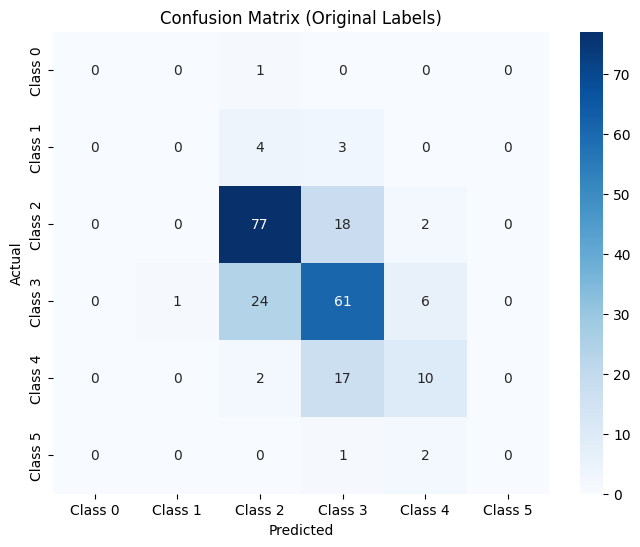

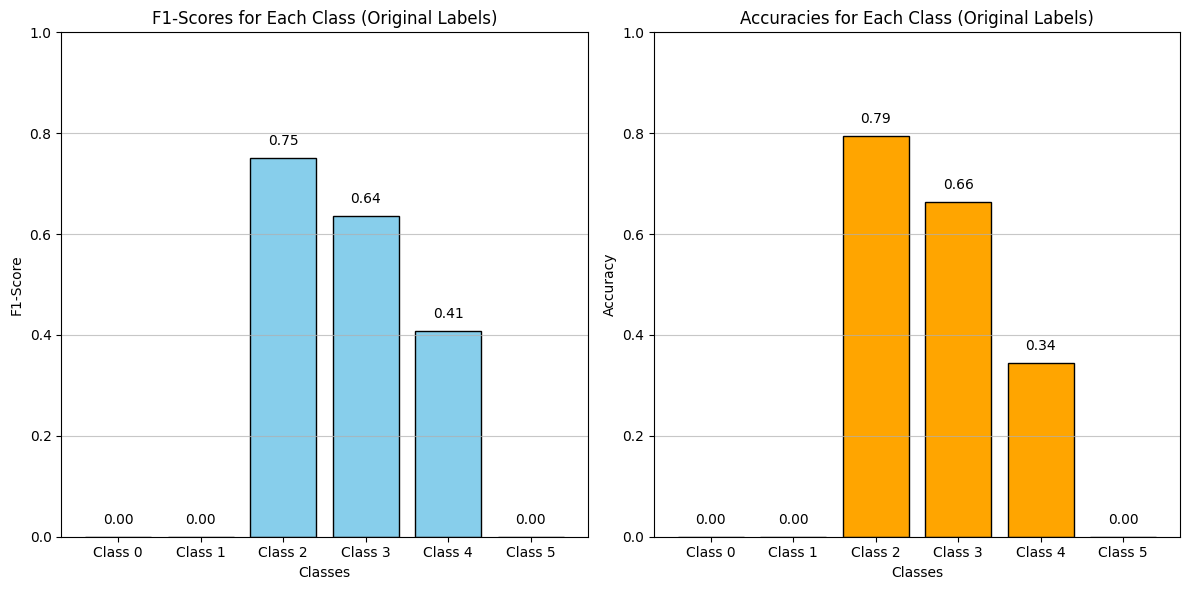

In [87]:
# Temperature-scaled softmax
temperature = 1.5
model = LogisticRegression(num_features=X_train.shape[1], num_classes=len(np.unique(y_train)),
                           softmax_variant="temperature", temperature=temperature)
train(model, X_train, y_train, X_test, y_test, num_epochs=10000, lr=0.003)

y_true = y_test
y_pred = model.predict(X_test)


# Reverse the class mapping dictionary
reverse_mapping = {v: k for k, v in class_mapping.items()}

# Convert predictions and true labels back to the original class labels
y_true_original = np.array([reverse_mapping[label] for label in y_true])
y_pred_original = np.array([reverse_mapping[label] for label in y_pred])

# Confusion Matrix with Original Class Labels
cm = confusion_matrix(y_true_original, y_pred_original)
print("\nConfusion Matrix:")

# Class-wise F1-Scores and Accuracies with Original Labels
class_f1_scores = f1_score(y_true_original, y_pred_original, average=None)
class_accuracies = [cm[i, i] / cm[i].sum() for i in range(len(cm))]

# Visualization: Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[f"Class {i}" for i in np.unique(y_true_original)],
            yticklabels=[f"Class {i}" for i in np.unique(y_true_original)])
plt.title("Confusion Matrix (Original Labels)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Visualization: F1-Scores and Accuracies
classes = [f"Class {i}" for i in np.unique(y_true_original)]

plt.figure(figsize=(12, 6))

# F1-Scores
plt.subplot(1, 2, 1)
bars_f1 = plt.bar(classes, class_f1_scores, color='skyblue', edgecolor='black')
plt.title("F1-Scores for Each Class (Original Labels)")
plt.xlabel("Classes")
plt.ylabel("F1-Score")
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.7)

# Add F1-Scores as Text
for bar in bars_f1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f'{height:.2f}', ha='center', va='bottom')

# Accuracies
plt.subplot(1, 2, 2)
bars_acc = plt.bar(classes, class_accuracies, color='orange', edgecolor='black')
plt.title("Accuracies for Each Class (Original Labels)")
plt.xlabel("Classes")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.7)

# Add Accuracies as Text
for bar in bars_acc:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [97]:
num_features = X_train.shape[1]
num_classes = len(np.unique(y_train))
model = LogisticRegression(num_features, num_classes,
    l2_reg=0.01)

# Train the model
train(model, X_train, y_train, X_test, y_test, num_epochs=10000, lr=0.002)

Epoch 1/10000: Loss=1.7945, Train Accuracy=0.1302, Test Accuracy=0.1397, F1-Score=0.1785
Epoch 1001/10000: Loss=1.3455, Train Accuracy=0.5810, Test Accuracy=0.6157, F1-Score=0.5845
Epoch 2001/10000: Loss=1.1734, Train Accuracy=0.5832, Test Accuracy=0.6332, F1-Score=0.5991
Epoch 3001/10000: Loss=1.0935, Train Accuracy=0.6018, Test Accuracy=0.6288, F1-Score=0.5986
Epoch 4001/10000: Loss=1.0492, Train Accuracy=0.6018, Test Accuracy=0.6332, F1-Score=0.6080
Epoch 5001/10000: Loss=1.0219, Train Accuracy=0.6083, Test Accuracy=0.6463, F1-Score=0.6236
Epoch 6001/10000: Loss=1.0037, Train Accuracy=0.6061, Test Accuracy=0.6419, F1-Score=0.6208
Epoch 7001/10000: Loss=0.9910, Train Accuracy=0.6050, Test Accuracy=0.6376, F1-Score=0.6169
Epoch 8001/10000: Loss=0.9817, Train Accuracy=0.6039, Test Accuracy=0.6332, F1-Score=0.6135
Epoch 9001/10000: Loss=0.9746, Train Accuracy=0.6018, Test Accuracy=0.6332, F1-Score=0.6135
Epoch 10000/10000: Loss=0.9691, Train Accuracy=0.6050, Test Accuracy=0.6332, F1-Sco

# Report on Softmax Variations: Weighted Softmax and Temperature-Based Softmax

## Introduction

The **Softmax function** is commonly used in classification tasks to convert logits into probabilities. However, in cases of imbalanced datasets or scenarios requiring finer control over class probabilities, standard softmax may fall short. To address these issues, **Weighted Softmax** and **Temperature-Based Softmax** were implemented as variations to improve the model's performance.

---

## Variations Implemented

### 1. **Weighted Softmax**
   - **Objective**: Assign higher importance to underrepresented classes by introducing class weights into the softmax function.
   - **Implementation**:
     \[
     \text{Softmax}_\text{weighted}(z_i) = \frac{w_i \cdot e^{z_i}}{\sum_j w_j \cdot e^{z_j}}
     \]
     Here, \(w_i\) is the weight assigned to class \(i\), inversely proportional to the class frequency in the training data.

   - **Expected Outcome**: By penalizing misclassifications of minority classes more heavily, the model should improve recall and F1-score for these classes.

---

### 2. **Temperature-Based Softmax**
   - **Objective**: Adjust the sharpness of the output probabilities using a temperature parameter \(T\).
   - **Implementation**:
     \[
     \text{Softmax}_\text{temp}(z_i) = \frac{e^{z_i / T}}{\sum_j e^{z_j / T}}
     \]
     - \(T > 1\): Produces smoother probability distributions, reducing overconfidence.
     - \(T < 1\): Produces sharper distributions, making the model more confident in its predictions.

   - **Expected Outcome**: Smoother probabilities (higher \(T\)) were expected to improve calibration, while sharper probabilities (lower \(T\)) were expected to improve precision.

---

## Results

### Performance Comparison
After implementing these variations, we compared the results against the baseline softmax model. The key metrics (accuracy, F1-score, and class-wise confusion matrix) showed minimal or no improvement, particularly for minority classes. Below is the analysis:

1. **Weighted Softmax**:
   - **Observation**: Despite applying weights to balance class contributions, the results for minority classes (e.g., Classes 3, 4, and 8) remained poor.
   - **Possible Reason**:
     - The dataset's imbalance might be too severe for weighting alone to correct.
     - Features may lack the discriminatory power required for the minority classes, limiting the benefits of weighting.

2. **Temperature-Based Softmax**:
   - **Observation**: Adjusting the temperature did not significantly improve the model's F1-scores or accuracies for any class.
   - **Possible Reason**:
     - Smoother probabilities (higher \(T\)) may have diluted the contributions of confident predictions, worsening performance for certain classes.
     - Sharper probabilities (lower \(T\)) might have amplified the model's biases towards majority classes, further disadvantaging minority classes.

---

## Why Did These Variations Fail to Improve Results?

1. **Feature Limitations**:
   - Both variations operate on logits and probabilities but do not address potential shortcomings in the input features. If features cannot distinguish between classes, no adjustment to softmax will resolve this issue.

2. **Class Overlap**:
   - There might be significant overlap in the feature space for certain classes, making it inherently difficult for the model to separate them.

3. **Extreme Class Imbalance**:
   - Classes like 3, 4, and 8 might have insufficient samples for the model to learn meaningful patterns, even with weighting.

4. **Bias in the Model**:
   - The logistic regression model might inherently favor majority classes due to its optimization objective, making it challenging for weighting or temperature adjustments to counteract this bias.

---

## Conclusion

- **Conclusion**:
  - While Weighted Softmax and Temperature-Based Softmax are theoretically sound, their effectiveness depends heavily on the dataset and feature quality.
  - In this case, neither variation significantly improved performance, highlighting the limitations of purely modifying the activation function.
